# Use Python to Analyze Different Cities' Weather

## Begin by generating city weather data via the 'OpenWeatherMap API'

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Use the citipy library to random cities lists.

In [2]:
#Generate lists 

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


## Make an API call to collect pertinent city weather information and analyze using Pandas. 

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except:
            print("City not found. Skipping...")
            pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | remire-montjoly
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | ancud
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | hadibu
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | oskaloosa
Processing Record 9 of Set 1 | pisco
Processing Record 10 of Set 1 | stanley
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | blackmans bay
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | warrnambool
Processing Record 17 of Set 1 | alice springs
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | kununurra
Processing Record 20 of Set 1 | doschatoye
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | ust'-kut


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,12.40,84,100,2.05,ZA,1717732087
1,remire-montjoly,4.9167,-52.2667,26.02,100,0,0.00,GF,1717731990
2,isafjordur,66.0755,-23.1240,1.20,94,98,8.53,IS,1717732087
3,ancud,-41.8697,-73.8203,10.71,91,82,4.42,CL,1717732087
4,puerto natales,-51.7236,-72.4875,-0.73,96,98,1.08,CL,1717732087


In [6]:
# push the data frame to the ouptut folder of this repo. 
city_data_df.to_csv("../output_data/city_data_df.csv")

# Generate Scatter Plots for Correlation Analysis of Weather Conditions in Varying Hemispheres. 

#### Max Temp. vs. Latitude

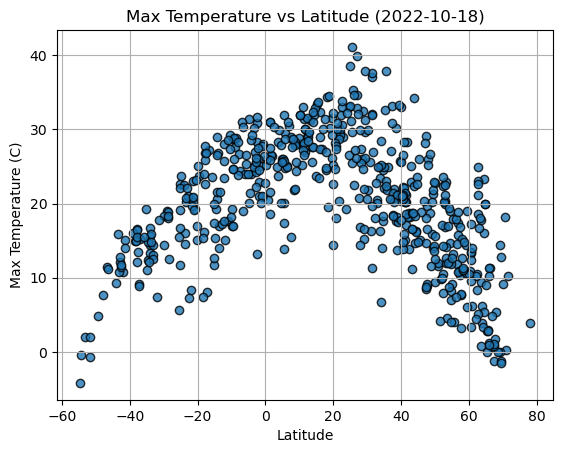

In [12]:
#Create Scatter Plots

# Build scatter plot for latitude vs. temperature


plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor = 'black', linewidths = 1, marker = 'o', 
           alpha = 0.8)
    
    
# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Max Temperature vs Latitude (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/MaxtempvsLat.png")

plt.show()

#### City Humidity vs. Latitude

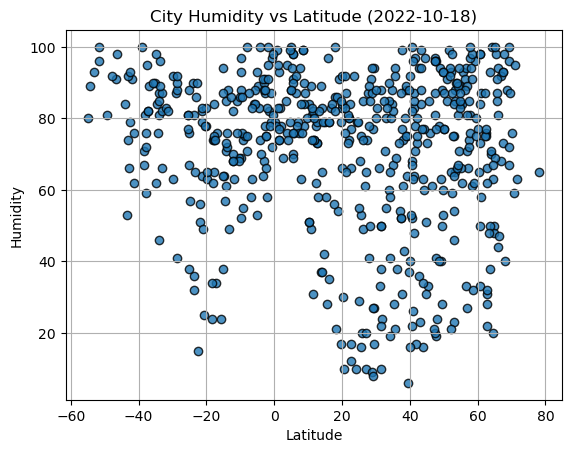

In [13]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor = 'black', linewidths = 1, marker = 'o', 
           alpha = 0.8)
    
    
# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Humidity vs Latitude (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/HumidvsLat.png")

plt.show()

#### City Cloudiness vs. Latitude

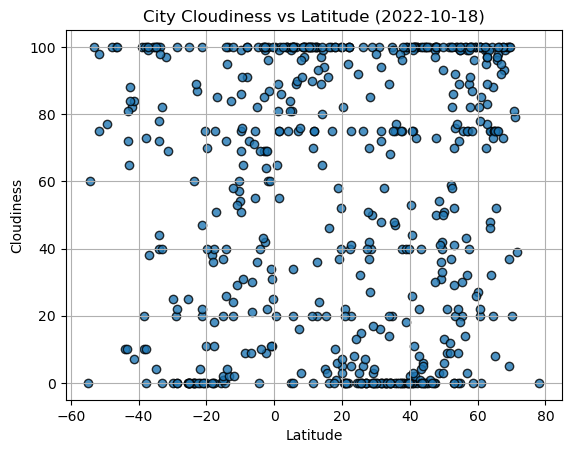

In [14]:
#Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor = 'black', linewidths = 1, marker = 'o', 
           alpha = 0.8)
    
    
# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Cloudiness vs Latitude (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/CloudinessvsLat.png")


plt.show()

#### City Wind Speed vs. Latitude

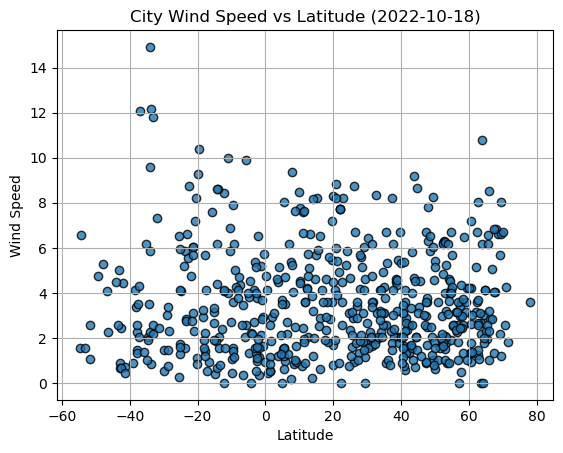

In [15]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor = 'black', linewidths = 1, marker = 'o', 
           alpha = 0.8)
    
    
# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Wind Speed vs Latitude (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/WindSpeedvsLat.png")

plt.show()

#### Max Temp vs Latitude in N.H. Correlation 

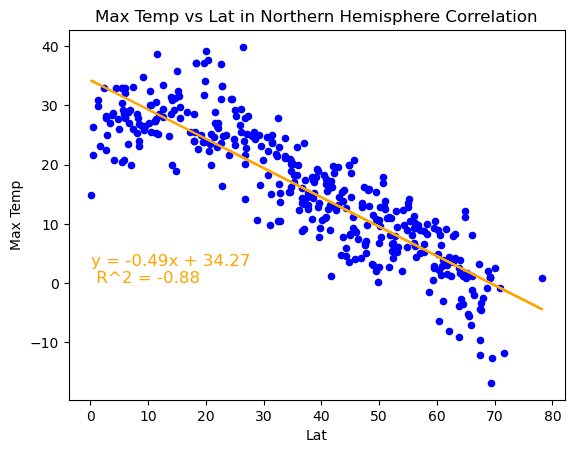

The correlation between Max Temp and Latitude in the Northern Hemispher is-0.88


In [22]:
#Northern Hemisphere Max Temp and Latitude 

northem_lat = city_data_df.loc[(city_data_df['Lat'] >= 0)]

results_list=st.linregress(northem_lat['Lat'],northem_lat['Max Temp'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=northem_lat['Lat']
y_pred=slope*np.array(x)+intercept
northem_lat.plot.scatter(['Lat'],['Max Temp'],xlabel='Lat',ylabel='Max Temp' ,title= 'Max Temp vs Lat in Northern Hemisphere Correlation' ,color='blue')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq += f"\n R^2 = {r_value}"
plt.plot(x, y_pred, color = 'orange')
plt.annotate(line_eq, (.09, .02), fontsize=12,color="orange") 


model = st.linregress(northem_lat["Lat"],northem_lat["Max Temp"])
y_values = northem_lat["Lat"]*model[0] + model[1]
plt.plot(x, y_values,color='orange')

plt.show()

correlation1= st.pearsonr(northem_lat["Lat"], northem_lat["Max Temp"])
print(f"The correlation between Max Temp and Latitude in the Northern Hemispher is{round(correlation1[0],2)}")


#### Max Temp vs Latitude in S.H. Correlation 

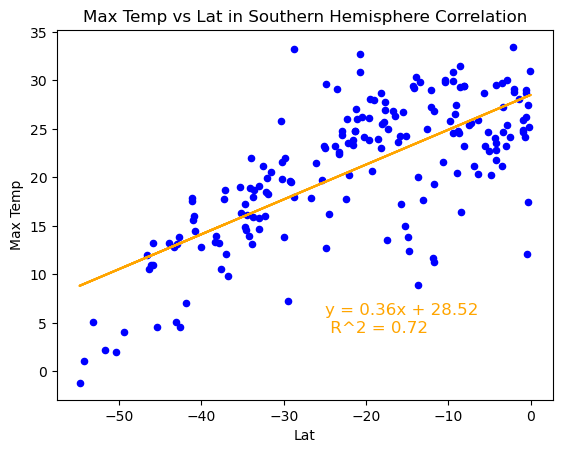

The correlation between Max Temp and Latitude in the Southern Hemispher is0.72


In [79]:
#Souther Hemisphere Max Temp and Latitude 
southernhem_lat = city_data_df.loc[(city_data_df['Lat'] < 0)]

results_list=st.linregress(southernhem_lat['Lat'],southernhem_lat['Max Temp'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=southernhem_lat['Lat']
y_pred=slope*np.array(x)+intercept
southernhem_lat.plot.scatter(['Lat'],['Max Temp'],xlabel='Lat',ylabel='Max Temp' ,title= 'Max Temp vs Lat in Southern Hemisphere Correlation' ,color='blue')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq += f"\n R^2 = {r_value}"
plt.plot(x, y_pred, color = 'orange')
plt.annotate(line_eq, (-25, 4.0), fontsize=12,color="orange") 


model = st.linregress(southernhem_lat["Lat"],southernhem_lat["Max Temp"])
y_values = southernhem_lat["Lat"]*model[0] + model[1]
plt.plot(x, y_values,color='orange')

plt.show()

correlation1= st.pearsonr(southernhem_lat["Lat"], southernhem_lat["Max Temp"])
print(f"The correlation between Max Temp and Latitude in the Southern Hemispher is{round(correlation1[0],2)}")




#### Humidity vs Latitude in N.H. Correlation 

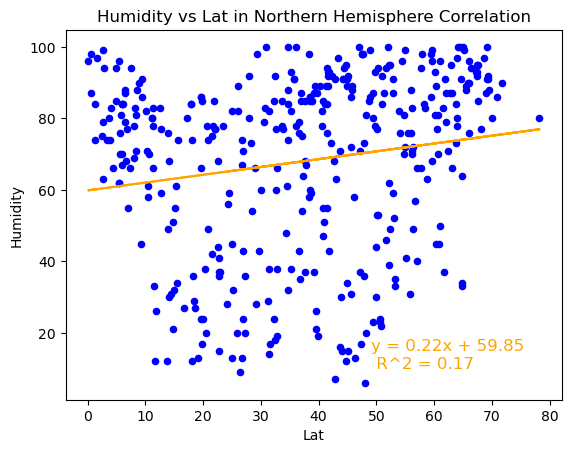

The correlation between Max Temp and Latitude in the Northern Hemispher is0.17


In [97]:
#Northern Hemisphere Humidity and Latitude 

northem_lat = city_data_df.loc[(city_data_df['Lat'] >= 0)]

results_list=st.linregress(northem_lat['Lat'],northem_lat['Humidity'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=northem_lat['Lat']
y_pred=slope*np.array(x)+intercept
northem_lat.plot.scatter(['Lat'],['Humidity'],xlabel='Lat',ylabel='Humidity' ,title= 'Humidity vs Lat in Northern Hemisphere Correlation' ,color='blue')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq += f"\n R^2 = {r_value}"
plt.plot(x, y_pred, color = 'orange')
plt.annotate(line_eq, (49.0, 10), fontsize=12,color="orange") 


model = st.linregress(northem_lat["Lat"],northem_lat["Humidity"])
y_values = northem_lat["Lat"]*model[0] + model[1]
plt.plot(x, y_values,color='orange')

plt.show()

correlation1= st.pearsonr(northem_lat["Lat"], northem_lat["Humidity"])
print(f"The correlation between Max Temp and Latitude in the Northern Hemispher is{round(correlation1[0],2)}")



#### Humidity vs Latitude in S.H. Correlation 

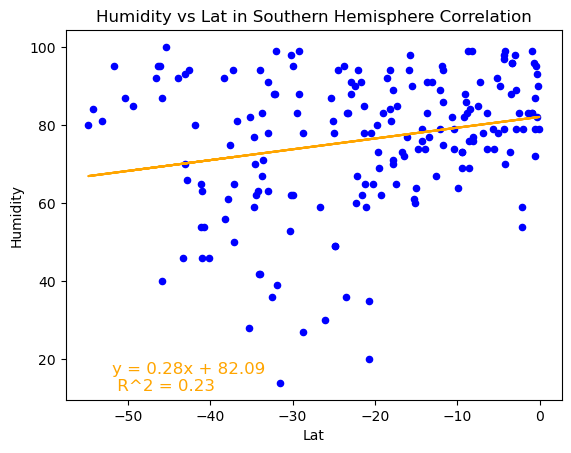

The correlation between Humidity and Latitude in the Southern Hemispher is0.23


In [103]:
#Southern Hemisphere Humidity and Latitude 
southernhem_lat = city_data_df.loc[(city_data_df['Lat'] < 0)]

results_list=st.linregress(southernhem_lat['Lat'],southernhem_lat['Humidity'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=southernhem_lat['Lat']
y_pred=slope*np.array(x)+intercept
southernhem_lat.plot.scatter(['Lat'],['Humidity'],xlabel='Lat',ylabel='Humidity' ,title= 'Humidity vs Lat in Southern Hemisphere Correlation' ,color='blue')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq += f"\n R^2 = {r_value}"
plt.plot(x, y_pred, color = 'orange')
plt.annotate(line_eq, (-52, 12), fontsize=12,color="orange") 


model = st.linregress(southernhem_lat["Lat"],southernhem_lat["Humidity"])
y_values = southernhem_lat["Lat"]*model[0] + model[1]
plt.plot(x, y_values,color='orange')

plt.show()

correlation1= st.pearsonr(southernhem_lat["Lat"], southernhem_lat["Humidity"])
print(f"The correlation between Humidity and Latitude in the Southern Hemispher is{round(correlation1[0],2)}")





#### Cloudiness vs Latitude in N.H. Correlation 

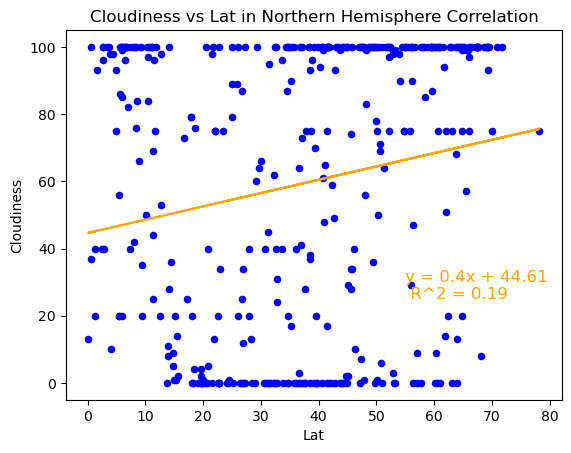

The correlation between Cloudiness and Latitude in the Northern Hemispher is0.19


In [64]:
#Northern Hemisphere Cloudiness and Latitude 

northem_lat = city_data_df.loc[(city_data_df['Lat'] >= 0)]

results_list=st.linregress(northem_lat['Lat'],northem_lat['Cloudiness'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=northem_lat['Lat']
y_pred=slope*np.array(x)+intercept
northem_lat.plot.scatter(['Lat'],['Cloudiness'],xlabel='Lat',ylabel='Cloudiness' ,title= 'Cloudiness vs Lat in Northern Hemisphere Correlation' ,color='blue')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq += f"\n R^2 = {r_value}"
plt.plot(x, y_pred, color = 'orange')
plt.annotate(line_eq, (55, 25), fontsize=12,color="orange") 


model = st.linregress(northem_lat["Lat"],northem_lat["Cloudiness"])
y_values = northem_lat["Lat"]*model[0] + model[1]
plt.plot(x, y_values,color='orange')

plt.show()

correlation1= st.pearsonr(northem_lat["Lat"], northem_lat["Cloudiness"])
print(f"The correlation between Cloudiness and Latitude in the Northern Hemispher is{round(correlation1[0],2)}")



#### Cloudiness vs Latitude in S.H. Correlation 

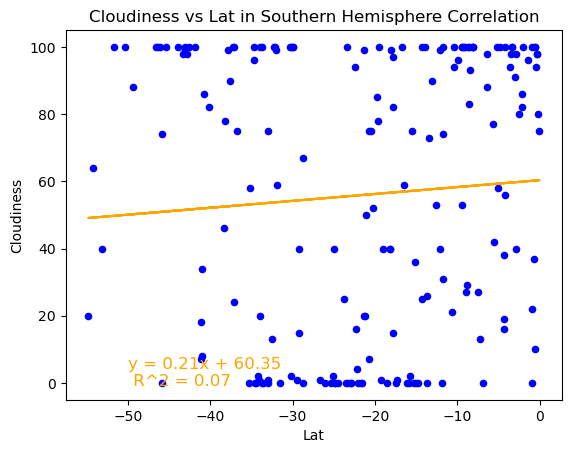

The correlation between Cloudiness and Latitude in the Southern Hemispher is0.07


In [56]:
#Southern Hemisphere Cloudiness and Latitude 
southernhem_lat = city_data_df.loc[(city_data_df['Lat'] < 0)]

results_list=st.linregress(southernhem_lat['Lat'],southernhem_lat['Cloudiness'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=southernhem_lat['Lat']
y_pred=slope*np.array(x)+intercept
southernhem_lat.plot.scatter(['Lat'],['Cloudiness'],xlabel='Lat',ylabel='Cloudiness' ,title= 'Cloudiness vs Lat in Southern Hemisphere Correlation' ,color='blue')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq += f"\n R^2 = {r_value}"
plt.plot(x, y_pred, color = 'orange')
plt.annotate(line_eq, (-50, -.99), fontsize=12,color="orange") 


model = st.linregress(southernhem_lat["Lat"],southernhem_lat["Cloudiness"])
y_values = southernhem_lat["Lat"]*model[0] + model[1]
plt.plot(x, y_values,color='orange')

plt.show()

correlation1= st.pearsonr(southernhem_lat["Lat"], southernhem_lat["Cloudiness"])
print(f"The correlation between Cloudiness and Latitude in the Southern Hemispher is{round(correlation1[0],2)}")



#### Wind Speed vs Latitude in N.H. Correlation 

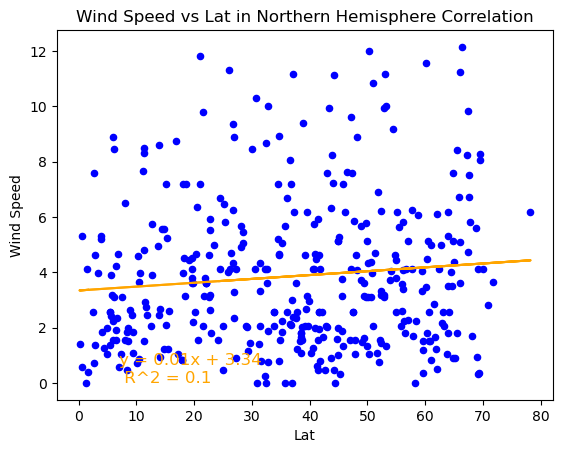

The correlation between Wind Speed and Latitude in the Northern Hemispher is0.1


In [34]:
#Northern Hemisphere Wind speed and Latitude 

northem_lat = city_data_df.loc[(city_data_df['Lat'] >= 0)]

results_list=st.linregress(northem_lat['Lat'],northem_lat['Wind Speed'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=northem_lat['Lat']
y_pred=slope*np.array(x)+intercept
northem_lat.plot.scatter(['Lat'],['Wind Speed'],xlabel='Lat',ylabel='Wind Speed' ,title= 'Wind Speed vs Lat in Northern Hemisphere Correlation' ,color='blue')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq += f"\n R^2 = {r_value}"
plt.plot(x, y_pred, color = 'orange')
plt.annotate(line_eq, (7, .02), fontsize=12,color="orange") 


model = st.linregress(northem_lat["Lat"],northem_lat["Wind Speed"])
y_values = northem_lat["Lat"]*model[0] + model[1]
plt.plot(x, y_values,color='orange')

plt.show()

correlation1= st.pearsonr(northem_lat["Lat"], northem_lat["Wind Speed"])
print(f"The correlation between Wind Speed and Latitude in the Northern Hemispher is{round(correlation1[0],2)}")



#### Wind Speed vs Latitude in S.H. Correlation 

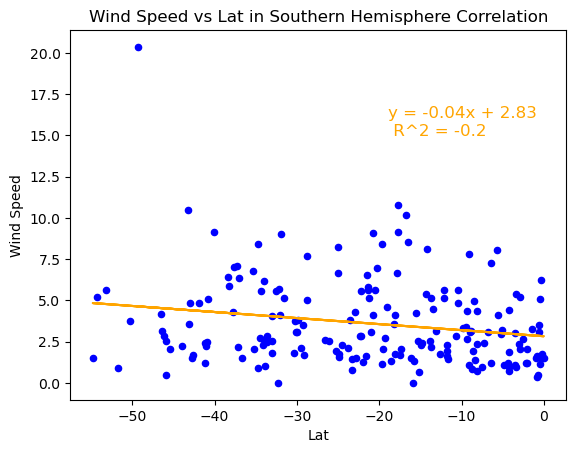

The correlation between Wind Speed and Latitude in the Southern Hemispher is-0.2


In [45]:
#Southern Hemisphere Wind speed and Latitude 
southernhem_lat = city_data_df.loc[(city_data_df['Lat'] < 0)]

results_list=st.linregress(southernhem_lat['Lat'],southernhem_lat['Wind Speed'])
slope=results_list[0]
intercept=results_list[1]
r_value=round(results_list[2],2)
x=southernhem_lat['Lat']
y_pred=slope*np.array(x)+intercept
southernhem_lat.plot.scatter(['Lat'],['Wind Speed'],xlabel='Lat',ylabel='Wind Speed' ,title= 'Wind Speed vs Lat in Southern Hemisphere Correlation' ,color='blue')

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq += f"\n R^2 = {r_value}"
plt.plot(x, y_pred, color = 'orange')
plt.annotate(line_eq, (-19.0, 15), fontsize=12,color="orange") 


model = st.linregress(southernhem_lat["Lat"],southernhem_lat["Wind Speed"])
y_values = southernhem_lat["Lat"]*model[0] + model[1]
plt.plot(x, y_values,color='orange')

plt.show()

correlation1= st.pearsonr(southernhem_lat["Lat"], southernhem_lat["Wind Speed"])
print(f"The correlation between Wind Speed and Latitude in the Southern Hemispher is{round(correlation1[0],2)}")

